In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
import os
from scipy import stats
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
training= pd.read_csv("train.csv")
testing= pd.read_csv("test.csv")

In [3]:
#Viewing and exploring training data
training.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
training.shape

(10000, 12)

In [5]:
training.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [6]:
#Checking shape, size and description of testing data
testing.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [7]:
testing.shape

(2500, 11)

In [8]:
testing.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,41.825224,12.946400,6.574800,65.368058,0.376197,79.993068,3.853600,32383.134179,1.990800,0.250886,6186.283200
std,16.280187,3.523364,7.179542,11.442005,0.116960,2.713833,1.877652,9485.096436,1.018592,0.387663,3602.235035
min,0.000000,1.000000,0.000000,20.966272,0.143376,74.740000,1.000000,831.695553,0.000000,0.000368,1.000000
25%,30.593607,11.000000,1.000000,57.702826,0.292583,77.930000,2.000000,26008.851717,1.000000,0.013136,3071.750000
50%,41.461187,13.000000,4.000000,66.066545,0.357404,79.600000,4.000000,32472.865497,2.000000,0.072466,6159.500000
75%,52.751142,15.000000,9.000000,73.119872,0.441699,81.530000,5.000000,38759.519071,3.000000,0.315407,9309.250000
max,100.000000,23.000000,54.000000,97.994531,0.881926,94.200000,7.000000,62315.408444,5.000000,2.365378,12493.000000


One thing to note here is that the test data follows a similar distribution as the training data except two variables 'Control_Metric' and 'Turbulenece_in_gforces' with different Interquertile Range(IQR).

In [9]:
#Let's check for Na values
print("Null values in training:", training.isnull().sum())
print("Null values in testing:", testing.isnull().sum())


Null values in training: Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64
Null values in testing: Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64


In [10]:
#Checkng unique values of dependent variable
training['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [11]:
#I feel 'Accident_Type_Code' doesn't add a lot of value to the analysis as it's a categorical representation of Accident Severity.
training= training.drop(['Accident_Type_Code', 'Accident_ID'], axis=1)
testing2= testing.drop(['Accident_Type_Code'], axis=1)


In [12]:
#Print their respective shapes
print("Shape of training data is:", training.shape)
print("Shape of testing data is:", testing2.shape)

Shape of training data is: (10000, 10)
Shape of testing data is: (2500, 10)


EDA on Training Data

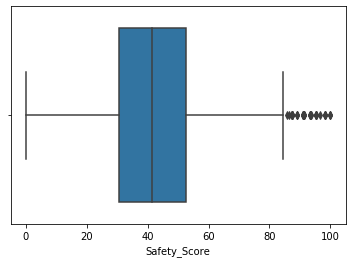

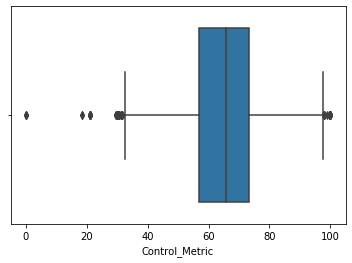

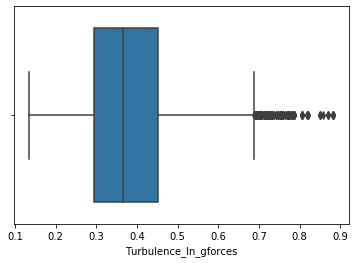

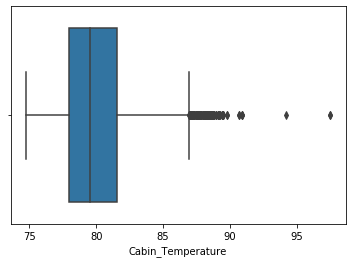

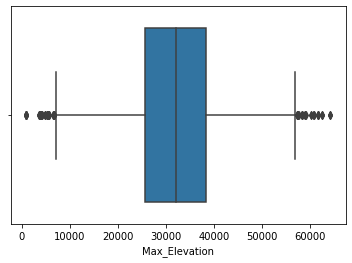

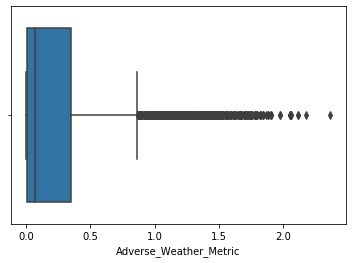

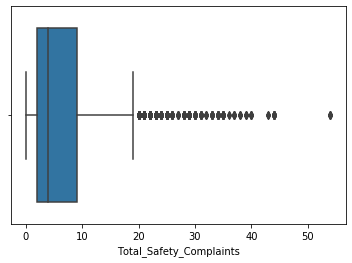

In [13]:
#Check for outliers
num_df= training[['Safety_Score','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation','Adverse_Weather_Metric','Total_Safety_Complaints']]
for i in num_df:
    sns.boxplot(num_df[i])
    plt.show()

As can be seen from boxplots above, the data is prone to a lot of outliers especially variables like 'Total_Safety_Complaints', 'Adverse_Weather_Metric' and 'Turbulence_in_gforces'. Removing them does not make sense as it will lead to a lot of data loss.
Let's see if we can improve the situation by transforming these variables.

In [14]:
#Let's map the Dependent variable to their respective categorial dummies
training['Severity']= training.Severity.map({'Minor_Damage_And_Injuries': '1', 'Significant_Damage_And_Fatalities': '2', 'Significant_Damage_And_Serious_Injuries': '3', 'Highly_Fatal_And_Damaging': '4'})
training.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,0.352350
2,2,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,0.003364
3,3,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,0.211728
4,2,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,0.176883


(array([2527.,    0.,    0., 1695.,    0.,    0., 2729.,    0.,    0.,
        3049.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

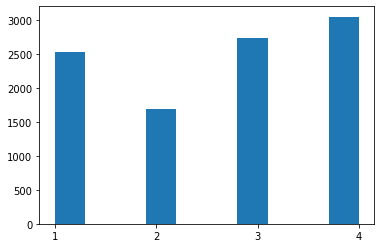

In [15]:
#Check distribution of 'Severity' to see that there isn't any imbalance in the data
plt.hist(training['Severity'])

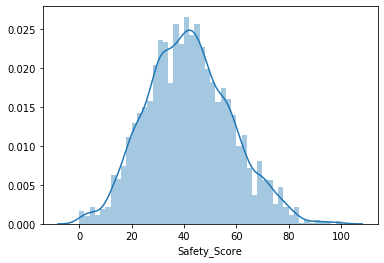

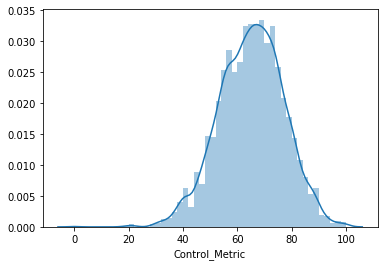

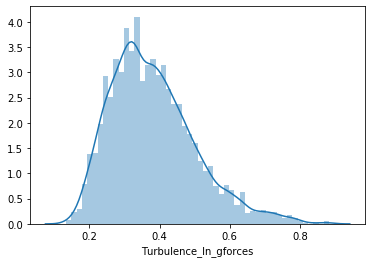

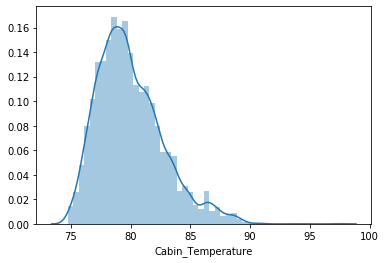

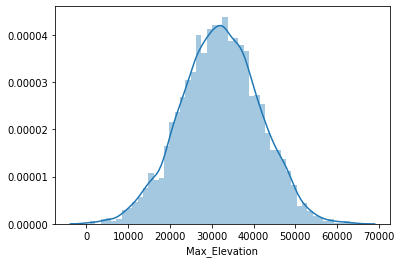

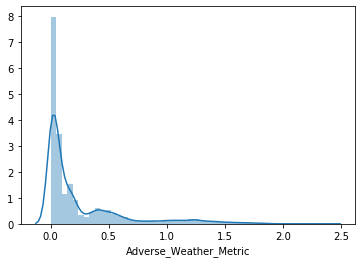

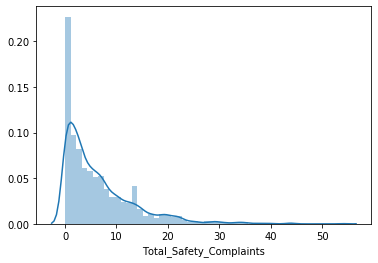

In [16]:
#Check distrubution of other variables
for i in num_df:
    sns.distplot(num_df[i])
    plt.show()

As expected, there is skewness in some variables which will require transformation. 'Safety_Score' and 'Control_Metric' are okay but the other variables will require transformation. 
1. Left skew: 'Control_Metric' shows skewness towards left and we can apply a power tranform to it.
2. Right Skew: 'Cabin_Temperature', 'Total_Safety_Complaints', 'Adverse_Weather_Metric' and 'Turbulence_in_gforces' show skew towards right and can be fixed with a log transform.


In [17]:
#Fixing the right skew
num_df['Total_Safety_Complaints'] = np.log(num_df['Total_Safety_Complaints']+1) #+1 cause the log here takes a negative value
num_df['Adverse_Weather_Metric'] = np.log(num_df['Adverse_Weather_Metric'])
num_df['Cabin_Temperature'] = np.log(num_df['Cabin_Temperature'])
num_df['Turbulence_In_gforces'] = np.log(num_df['Turbulence_In_gforces'])

#Fixing left skew
num_df['Control_Metric'] = np.power(num_df['Control_Metric'], 2)

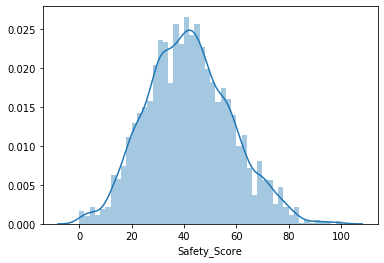

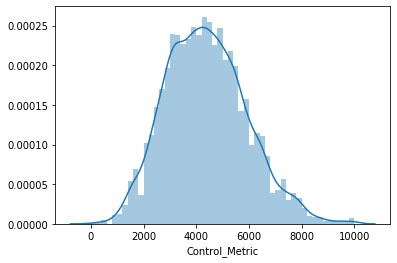

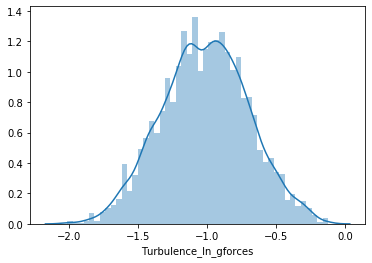

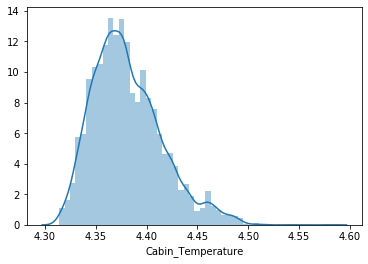

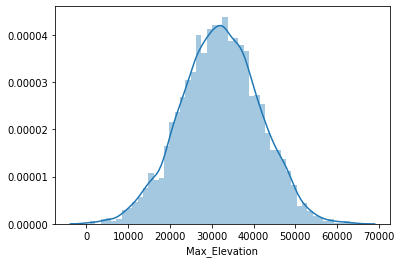

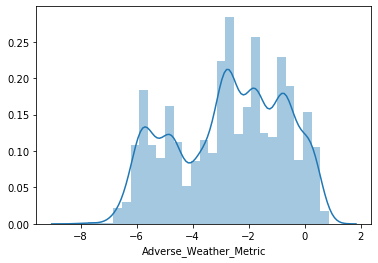

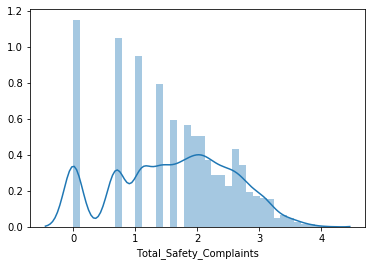

In [18]:
#Check the Distribution Again
for i in num_df:
    sns.distplot(num_df[i])
    plt.show()

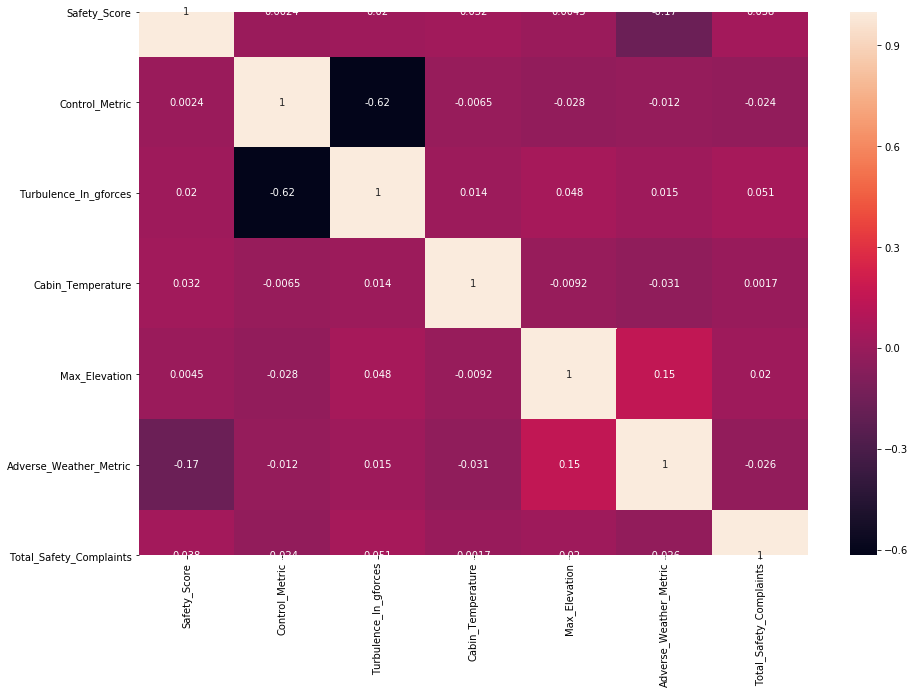

In [19]:
#Check the correlation amongst numerical variables
plt.figure(figsize=(15,10))
correlation= num_df.corr()
sns.heatmap(correlation, annot= True)
plt.show();

No variables show worrying levels of correlation to each other except 'Control_Metric', Turbulence and 'Cabin_Temperature'. However, keeping them in the model yielded better results. Also, 0.6 is more closer to 0.5 than any extreme so i decided to keep them.

Standardization
Since all the variables are on a different scale, it's better to put them on a common scale before putting them through any kind of model.

In [20]:
#Let's put the entire dataset back together
Rem= training[['Days_Since_Inspection','Violations']]
train2= pd.concat([num_df, Rem], axis=1)
train2.head()

,Safety_Score,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Adverse_Weather_Metric,Total_Safety_Complaints,Days_Since_Inspection,Violations
0,49.223744,5081.597362,-1.301521,4.357222,31335.476824,-0.857192,3.135494,14,3
1,62.465753,5225.563379,-0.858166,4.437225,26024.711057,-1.043130,3.332205,10,2
2,63.059361,4404.022240,-1.131328,4.367674,39269.053927,-5.694652,2.833213,13,3
3,48.082192,5580.648391,-1.087586,4.404155,42771.499200,-1.552452,2.302585,11,1
4,26.484018,2299.101968,-0.614077,4.345881,35509.228515,-1.732265,3.258097,13,2


In [21]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
scaled_df= scaler.fit_transform(train2)
scaled_df= pd.DataFrame(scaled_df, columns= ['Safety_Score', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric', 'Total_Safety_Complaints', 'Days_Since_Inspection', 'Violations'])
scaled_df.head()

,Safety_Score,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Adverse_Weather_Metric,Total_Safety_Complaints,Days_Since_Inspection,Violations
0,0.455303,0.454029,-0.921825,-0.699846,-0.070649,0.957777,1.611091,0.301981,0.949873
1,1.275888,0.547877,0.492672,1.649054,-0.633736,0.861378,1.819935,-0.828082,-0.011732
2,1.312673,0.012333,-0.378835,-0.392957,0.770528,-1.550182,1.290165,0.019465,0.949873
3,0.384562,0.779349,-0.239277,0.678123,1.141883,0.597322,0.726805,-0.545566,-0.973336
4,-0.953841,-1.359818,1.271427,-1.032798,0.371883,0.504099,1.741256,0.019465,-0.011732


In [22]:
#Let's check the mean(Should be approximtaley 0) and SD(Ideally 1) of the scaled dataframe
scaled_df.mean()

Safety_Score              -3.835821e-17
Control_Metric            -9.570122e-17
Turbulence_In_gforces      8.358592e-17
Cabin_Temperature          6.953149e-15
Max_Elevation             -1.928457e-16
Adverse_Weather_Metric    -8.411050e-17
Total_Safety_Complaints   -4.022060e-17
Days_Since_Inspection      5.851916e-18
Violations                 3.470939e-17
dtype: float64

In [23]:
scaled_df.std()

Safety_Score               1.00005
Control_Metric             1.00005
Turbulence_In_gforces      1.00005
Cabin_Temperature          1.00005
Max_Elevation              1.00005
Adverse_Weather_Metric     1.00005
Total_Safety_Complaints    1.00005
Days_Since_Inspection      1.00005
Violations                 1.00005
dtype: float64

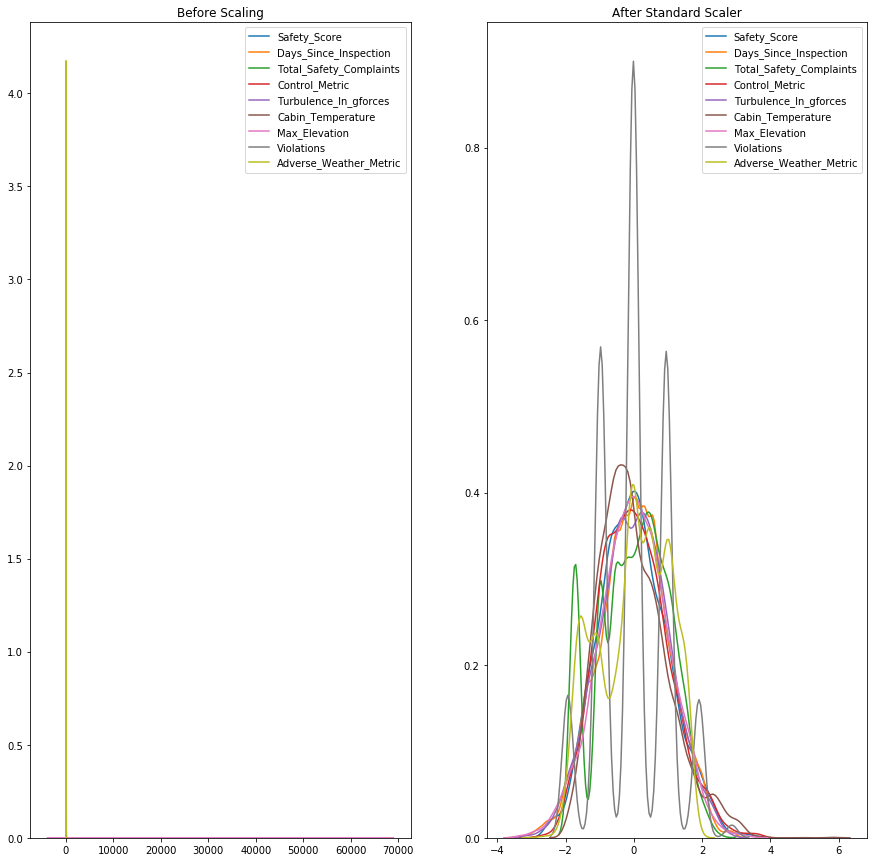

In [24]:
#Let's check the distribution of Variables now
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))

ax1.set_title('Before Scaling')
sns.kdeplot(training['Safety_Score'], ax=ax1)
sns.kdeplot(training['Days_Since_Inspection'], ax=ax1)
sns.kdeplot(training['Total_Safety_Complaints'], ax=ax1)
sns.kdeplot(training['Control_Metric'], ax=ax1)
sns.kdeplot(training['Turbulence_In_gforces'], ax=ax1)
sns.kdeplot(training['Cabin_Temperature'], ax=ax1)
sns.kdeplot(training['Max_Elevation'], ax=ax1)
sns.kdeplot(training['Violations'], ax=ax1)
sns.kdeplot(training['Adverse_Weather_Metric'], ax=ax1)


ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Safety_Score'], ax=ax2)
sns.kdeplot(scaled_df['Days_Since_Inspection'], ax=ax2)
sns.kdeplot(scaled_df['Total_Safety_Complaints'], ax=ax2)
sns.kdeplot(scaled_df['Control_Metric'], ax=ax2)
sns.kdeplot(scaled_df['Turbulence_In_gforces'], ax=ax2)
sns.kdeplot(scaled_df['Cabin_Temperature'], ax=ax2)
sns.kdeplot(scaled_df['Max_Elevation'], ax=ax2)
sns.kdeplot(scaled_df['Violations'], ax=ax2)
sns.kdeplot(scaled_df['Adverse_Weather_Metric'], ax=ax2)

plt.show()

It's quite clear that the data is now normally distributed with a mean 0 and a standard devaition of 1.
Let's apply the same transformation to Test Data before proceeding with Model fitting

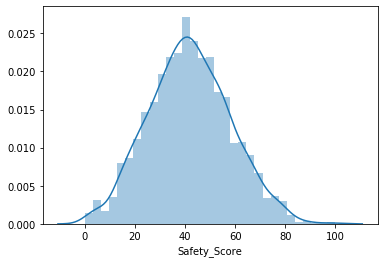

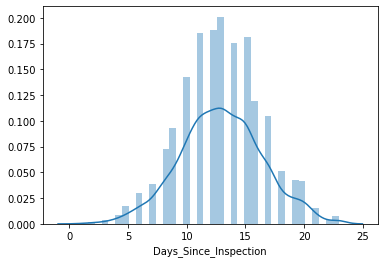

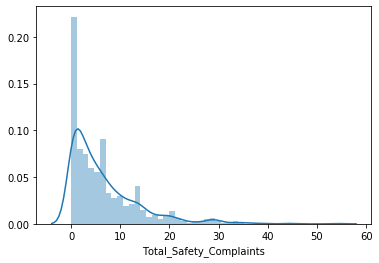

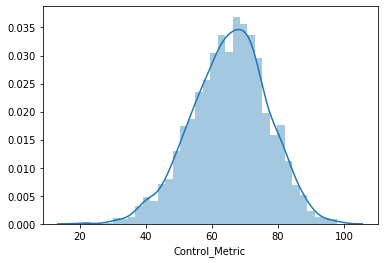

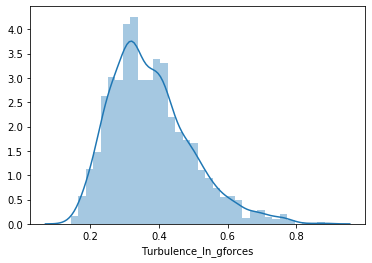

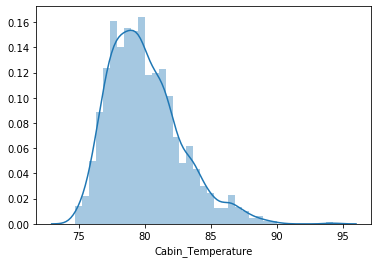

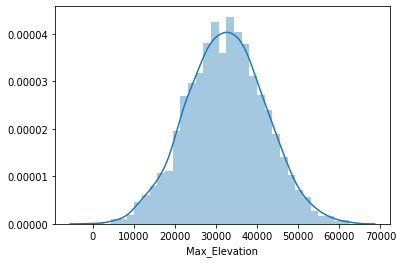

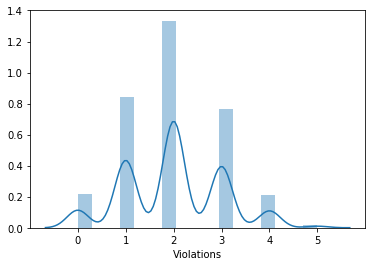

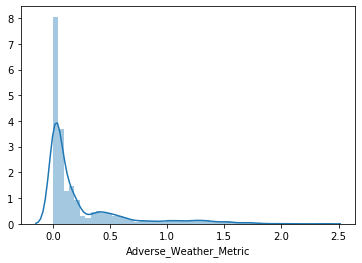

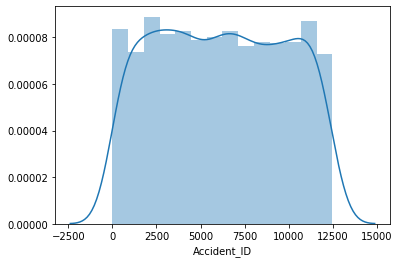

In [25]:
#Transforming variables- Most variables follow the pattern of the training dataset which can be confirmed from the distributions below
for i in testing2:
    sns.distplot(testing2[i])
    plt.show()

In [26]:
#Applying transformations
testing2['Total_Safety_Complaints'] = np.log(testing2['Total_Safety_Complaints']+1)
testing2['Adverse_Weather_Metric'] = np.log(testing2['Adverse_Weather_Metric']+1)
testing2['Cabin_Temperature'] = np.log(testing2['Cabin_Temperature']+1)
testing2['Turbulence_In_gforces'] = np.log(testing2['Turbulence_In_gforces']+1)

#Fixing left skew
testing2['Control_Metric'] = np.power(testing2['Control_Metric'], 2)

In [27]:
testing2.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,1.945910,5205.813236,0.328554,4.373490,37949.724386,2,0.067371,1
1,58.173516,15,1.386294,4171.252251,0.223816,4.377014,30194.805567,2,0.002774,10
2,33.287671,15,1.386294,4188.933272,0.290180,4.476882,17572.925484,1,0.004307,14
3,3.287671,21,1.791759,4404.022240,0.351906,4.405010,40209.186341,2,0.182314,17
4,10.867580,18,1.098612,3148.058972,0.272488,4.384773,35495.525408,2,0.394536,21


In [28]:
ID_Col= testing2[['Accident_ID']]
testing_df= testing2.drop(['Accident_ID'], axis=1)
testing_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,19.497717,16,1.945910,5205.813236,0.328554,4.373490,37949.724386,2,0.067371
1,58.173516,15,1.386294,4171.252251,0.223816,4.377014,30194.805567,2,0.002774
2,33.287671,15,1.386294,4188.933272,0.290180,4.476882,17572.925484,1,0.004307
3,3.287671,21,1.791759,4404.022240,0.351906,4.405010,40209.186341,2,0.182314
4,10.867580,18,1.098612,3148.058972,0.272488,4.384773,35495.525408,2,0.394536


In [29]:
#Standardization
scaler= preprocessing.StandardScaler()
scaled_df_test= scaler.fit_transform(testing_df)
scaled_df_test= pd.DataFrame(scaled_df_test, columns= ['Safety_Score', 'Days_Since_Inspection','Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric'])
scaled_df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,-1.371727,0.866845,0.355919,0.542584,0.153563,-0.614333,0.586995,0.009034,-0.483246
1,1.004384,0.582969,-0.232222,-0.157369,-1.111490,-0.507807,-0.230758,0.009034,-0.741989
2,-0.524519,0.582969,-0.232222,-0.145406,-0.309925,2.511257,-1.561731,-0.972910,-0.735846
3,-2.367618,2.286227,0.193911,0.000116,0.435613,0.338538,0.825254,0.009034,-0.022850
4,-1.901934,1.434598,-0.534568,-0.849630,-0.523613,-0.273256,0.328201,0.009034,0.827197


In [30]:
#Rearrange train data
train_df= scaled_df[['Safety_Score', 'Days_Since_Inspection','Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']]
train_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,0.455303,0.301981,1.611091,0.454029,-0.921825,-0.699846,-0.070649,0.949873,0.957777
1,1.275888,-0.828082,1.819935,0.547877,0.492672,1.649054,-0.633736,-0.011732,0.861378
2,1.312673,0.019465,1.290165,0.012333,-0.378835,-0.392957,0.770528,0.949873,-1.550182
3,0.384562,-0.545566,0.726805,0.779349,-0.239277,0.678123,1.141883,-0.973336,0.597322
4,-0.953841,0.019465,1.741256,-1.359818,1.271427,-1.032798,0.371883,-0.011732,0.504099


In [31]:
#Check if it's same as original scaled dataframe
scaled_df.head()

,Safety_Score,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Adverse_Weather_Metric,Total_Safety_Complaints,Days_Since_Inspection,Violations
0,0.455303,0.454029,-0.921825,-0.699846,-0.070649,0.957777,1.611091,0.301981,0.949873
1,1.275888,0.547877,0.492672,1.649054,-0.633736,0.861378,1.819935,-0.828082,-0.011732
2,1.312673,0.012333,-0.378835,-0.392957,0.770528,-1.550182,1.290165,0.019465,0.949873
3,0.384562,0.779349,-0.239277,0.678123,1.141883,0.597322,0.726805,-0.545566,-0.973336
4,-0.953841,-1.359818,1.271427,-1.032798,0.371883,0.504099,1.741256,0.019465,-0.011732


In [32]:
#Put into X and y arrays
X= train_df
y= training['Severity']

In [33]:
#Split into train and validation sets
X_train, X_Val, y_train, y_Val= train_test_split(X, y, test_size=0.2, random_state=50)
print("shape of training data:", X_train.shape, "\nShape of Validation data:", X_Val.shape, "\nShape of training label:", y_train.shape, "\nShape of Validation label:", y_Val.shape)

shape of training data: (8000, 9) 
Shape of Validation data: (2000, 9) 
Shape of training label: (8000,) 
Shape of Validation label: (2000,)


# Baseline Models

 We will try couple of Baseline Models like Logistic Regression, Random Forests and Naive Bayes.

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg= LogisticRegression(solver = 'lbfgs')

#Fit
logreg.fit(X_train, y_train)

#Predict
y_pred= logreg.predict(X_Val)

#Accuracy
print("Accuracy:",metrics.accuracy_score(y_Val, y_pred))


Accuracy: 0.591


In [36]:
# how did our model perform?
count_misclassified = (y_Val != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_Val, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 818
Accuracy: 0.59


# Naive Bayes  

In [37]:
from sklearn.naive_bayes import GaussianNB

#instantiate
model= GaussianNB()

#Fit
model.fit(X_train, y_train)

#predict
predicted= model.predict(X_Val)

In [38]:
#Check accuracy metrics
# how did our model perform?
count_misclassified = (y_Val != predicted).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_Val, predicted)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1077
Accuracy: 0.46


# Support Vector Machine

In [39]:
from sklearn.svm import LinearSVC

#Instantiate
svc= LinearSVC()

#Fit
svc.fit(X_train, y_train)

#predict
predicted= svc.predict(X_Val)

#Accuracy
print("accuracy is:", metrics.accuracy_score(y_Val, predicted ))

accuracy is: 0.5635


In [42]:
count_misclassified = (y_Val != predicted).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_Val, predicted)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 873
Accuracy: 0.56


I also tried grid search for all the above algortihms and got the best results with Support Vector Machines. so, in the end, I decided to train the model with an SVM.

# Model Fitting- Support Vector Machine (SVM)


Let's try a grid Search to get the best parameters for the SVM. 

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model= SVC()
params= { 'C': [0.1, 1, 10, 50, 100], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf', 'linear']}
gridsvm= GridSearchCV(model, params)
gridsvm.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
print(gridsvm.best_score_)
print(gridsvm.best_estimator_)

0.89425
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


This took some time to run. But with the parameters obtained, I was able to run an SVM model on the training data and check it against the validation set.

In [45]:
clfsvm= SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clfsvm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
#Predict on Validation Set
predsvm= clfsvm.predict(X_Val)

In [49]:
#Print Accuracy and Micro F1 Score
from sklearn import metrics
print("Accuracy with RFC is:",metrics.accuracy_score(y_Val, predsvm))
print("F1 score is:", metrics.f1_score(y_Val, predsvm, average= 'micro'))

Accuracy with RFC is: 0.9145
F1 score is: 0.9145


In [50]:
#Print the Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_Val, predsvm)
cnf_matrix

array([[468,   0,  16,   7],
       [  2, 316,   7,  15],
       [ 26,  10, 468,  13],
       [ 34,  21,  20, 577]], dtype=int64)

Text(33.0, 0.5, 'Actual label')

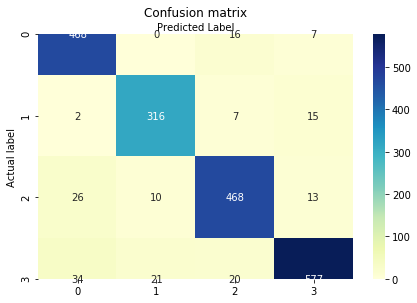

In [51]:
#Plot the Confusion Matrix
class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel("Predicted Label")
plt.ylabel('Actual label')

In [52]:
#Check the classification Report
classification_report= metrics.classification_report(y_Val, predsvm)
print(classification_report)

              precision    recall  f1-score   support

           1       0.88      0.95      0.92       491
           2       0.91      0.93      0.92       340
           3       0.92      0.91      0.91       517
           4       0.94      0.88      0.91       652

    accuracy                           0.91      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.92      0.91      0.91      2000



In [53]:
#Predict on Test Dataset
predictions= clfsvm.predict(scaled_df_test)

In [54]:
predictions

array(['4', '2', '3', ..., '3', '3', '4'], dtype=object)

In [55]:
predictions.shape

(2500,)

In [56]:
submission = pd.DataFrame({
        "Accident_ID": ID_Col["Accident_ID"],
        "Severity": predictions
    })

In [57]:
submission.head()

,Accident_ID,Severity
0,1,4
1,10,2
2,14,3
3,17,4
4,21,2


In [58]:
#Convert Severity Dummy values to their respective Categories
submission['Severity']= submission.Severity.map({'1': 'Minor_Damage_And_Injuries', '2':'Significant_Damage_And_Fatalities', '3':'Significant_Damage_And_Serious_Injuries',  '4': 'Highly_Fatal_And_Damaging'})
submission.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [59]:
#Save submission file to a csv
submission.to_csv('submission_svm.csv', index=False)

# Neural Network

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [61]:
#Make dummies for Y train variable
y= pd.get_dummies(y)

print(X.shape)
print(y.shape)

(10000, 9)
(10000, 4)


In [62]:
#Split into train and validation sets
X_train, X_Val, y_train, y_Val= train_test_split(X, y, test_size=0.2, random_state=20)
print("shape of training data:", X_train.shape, "\nShape of Validation data:", X_Val.shape, "\nShape of training label:", y_train.shape, "\nShape of Validation label:", y_Val.shape)


shape of training data: (8000, 9) 
Shape of Validation data: (2000, 9) 
Shape of training label: (8000, 4) 
Shape of Validation label: (2000, 4)


In [63]:
#Instantiate the Model
model= Sequential()
model.add(Dense(16, input_dim=9, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(4, activation= 'softmax'))


In [64]:
#Compile and Run
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.fit(X_train, y_train, epochs= 100, batch_size=10)

predicted= np.argmax(model.predict(X_Val), axis=1)


Epoch 1/100
8000/8000 [==============================] - 1s 131us/step - loss: 1.2679 - accuracy: 0.4351
Epoch 2/100
8000/8000 [==============================] - 1s 154us/step - loss: 0.8268 - accuracy: 0.7113
Epoch 3/100
8000/8000 [==============================] - 2s 249us/step - loss: 0.5386 - accuracy: 0.8242
Epoch 4/100
8000/8000 [==============================] - 2s 218us/step - loss: 0.4132 - accuracy: 0.8641
Epoch 5/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.3526 - accuracy: 0.8800
Epoch 6/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.3205 - accuracy: 0.8921
Epoch 7/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.3005 - accuracy: 0.9049
Epoch 8/100
8000/8000 [==============================] - 2s 228us/step - loss: 0.2862 - accuracy: 0.9133
Epoch 9/100
8000/8000 [==============================] - 2s 208us/step - loss: 0.2719 - accuracy: 0.9202
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 1s 144us/step - loss: 0.1711 - accuracy: 0.9438
Epoch 79/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.1700 - accuracy: 0.9445
Epoch 80/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.1698 - accuracy: 0.9440
Epoch 81/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.1679 - accuracy: 0.9440
Epoch 82/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.1684 - accuracy: 0.9455
Epoch 83/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.1693 - accuracy: 0.9438
Epoch 84/100
8000/8000 [==============================] - 2s 188us/step - loss: 0.1690 - accuracy: 0.9435
Epoch 85/100
8000/8000 [==============================] - 2s 231us/step - loss: 0.1699 - accuracy: 0.9451
Epoch 86/100
8000/8000 [==============================] - 2s 207us/step - loss: 0.1674 - accuracy: 0.9439
Epoch 87/100
8000/8000 [==============================] - 2

In [65]:
#Predict for Test Set
test_prediction= np.argmax(model.predict(scaled_df_test), axis=1)
test_prediction


array([3, 1, 2, ..., 2, 2, 3], dtype=int64)

In [66]:
#Writing the results to a CSV file
submission2= pd.DataFrame({
        "Accident_ID": ID_Col["Accident_ID"],
        "Severity": test_prediction
    })
submission2.head()

,Accident_ID,Severity
0,1,3
1,10,1
2,14,2
3,17,3
4,21,1
